In [1]:
import numpy as np
import matplotlib.pyplot as plt

# SVD - Classification

In [2]:
'Obtain the MNist dataset'
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
X,y=mnist['data'],mnist['target']
X.shape

(70000, 784)

In [3]:
'split dataset into training, validation and test'
X_train,y_train = X[:50000],y[:50000] #it is used to train the model
X_val,y_val = X[50000:60000], y[50000:60000] #it is used to choose the best parameters (k)
X_test,y_test = X[60000:],y[60000:] #it is used to test the model

In [4]:
'split X_train into X0,X1,...,X9'
X_list = [] #[X0,X1,...,X9]
for i in range(10):
    X_list.append(X_train[y_train==str(i)])

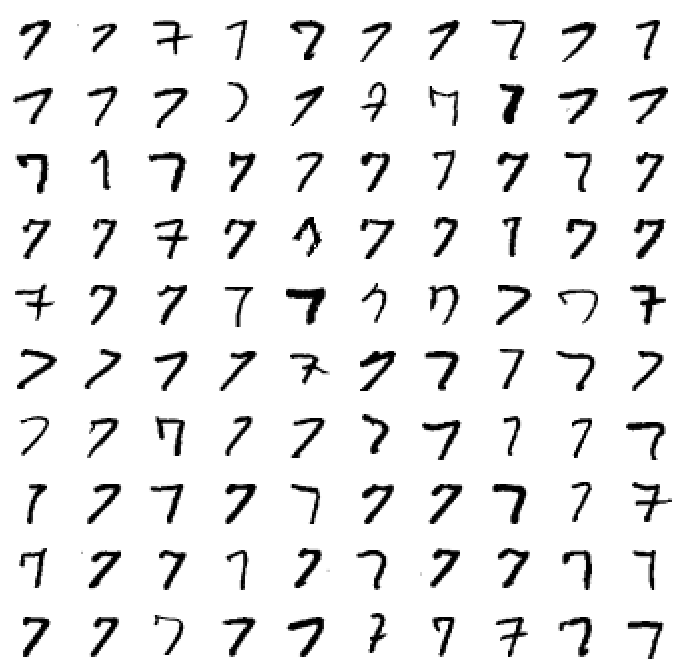

In [5]:
'for example, each row of X9  represents an image of a digit 9'
plt.figure(figsize=(12,12))
X7 = X_list[7]
for i in range(100):
    plt.subplot(10,10,i+1)
    image = X7[i].reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis('off')

In [6]:
'Compute the SVD of each matrix'
V_list = []
for i in range(10):
    U,D,V = np.linalg.svd(X_list[i])
    V_list.append(V)

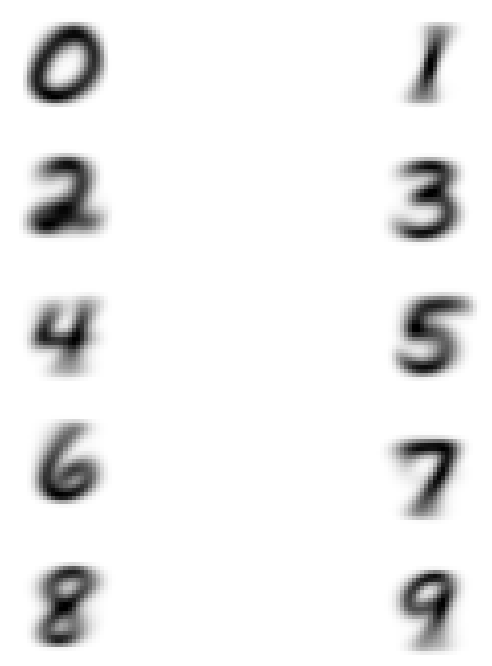

In [44]:
'first row of V'
plt.figure(figsize=(12,12))
for i in range(10):
    image = V_list[i][0].reshape(28,28)
    plt.subplot(5,2,i+1)
    plt.imshow(image,cmap='binary')
    plt.axis('off')

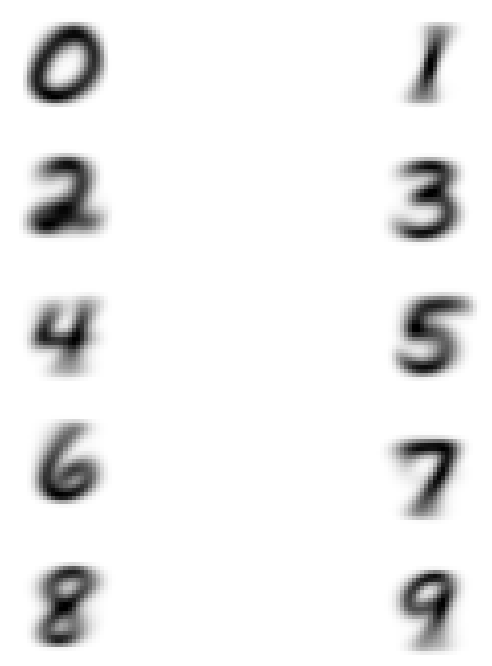

In [10]:
'second row of V'
plt.figure(figsize=(12,12))
for i in range(10):
    image = V_list[i][0].reshape(28,28)
    plt.subplot(5,2,i+1)
    plt.imshow(image,cmap='binary')
    plt.axis('off')

In [11]:
Vk_list = []
k = 4
for i in range(10):
    Vk_list.append(V_list[i][:k])

In [12]:
'Classify an unknown digit'
unknown_digit = X_train[123][None,:]

distances = np.zeros(10)
for i in range(10):
    orth = unknown_digit - unknown_digit@Vk_list[i].T@Vk_list[i]
    distances[i] = np.linalg.norm(orth)

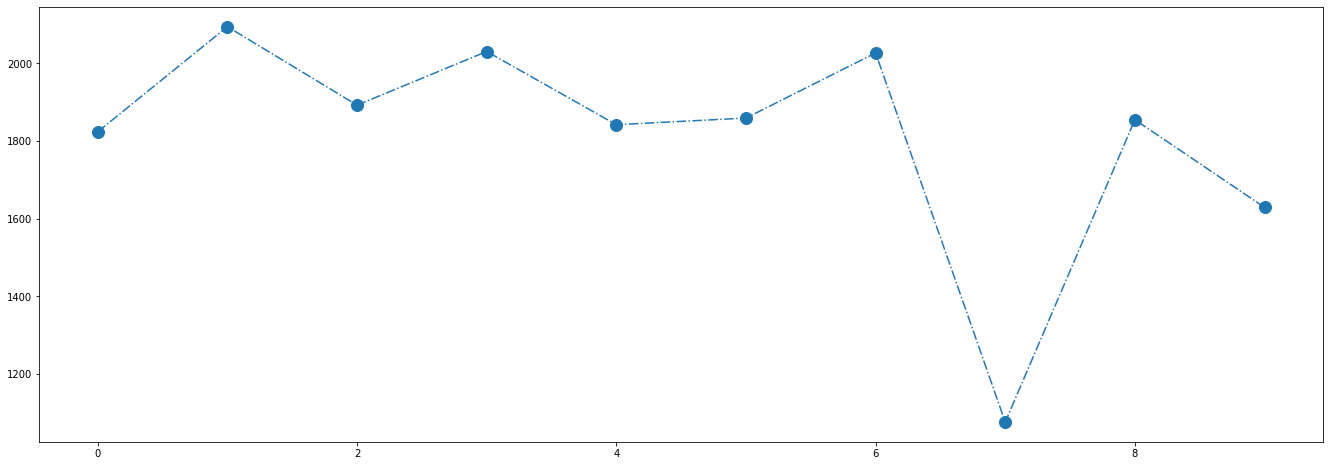

In [13]:
plt.figure(figsize=(23,8))
plt.plot(range(10),distances,'o-.',markersize=12)

In [14]:
np.argmin(distances)

7

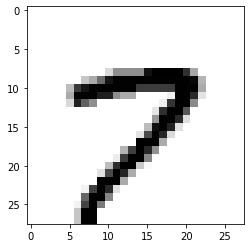

In [15]:
unknown_image = unknown_digit.reshape(28,28)
plt.imshow(unknown_image,cmap='binary')

# Choosing k

In [133]:
'classify the validation set using different values for k'
pct_incorrect = np.zeros((40,1))
k_list = [k+1 for k in range(40)]


for k in k_list: #k = 1,2,...,40
    print(k)
    
    'first k rows of the V matrices'
    Vk_list = []
    for i in range(10):
        Vk_list.append(V_list[i][:k])
    
    y_val_predicted = [] #initialize y_val_predicted
    'classify validation digits'
    for j in range(len(y_val)):
        unknown_digit = X_val[j,:]
        distances = np.zeros(10)
        'compute distances'
        for i in range(10):
            orth = unknown_digit - unknown_digit@Vk_list[i].T@Vk_list[i]
            distances[i] = np.linalg.norm(orth)            
        y_val_predicted.append(str(np.argmin(distances)))
        
    'percentage of incorrect classifications'
    num_incorrect = sum(y_val != y_val_predicted)
    pct_incorrect[k-1] = 100*num_incorrect/len(y_val)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


Text(0.5, 1.0, 'Percentage of incorrect classifications')

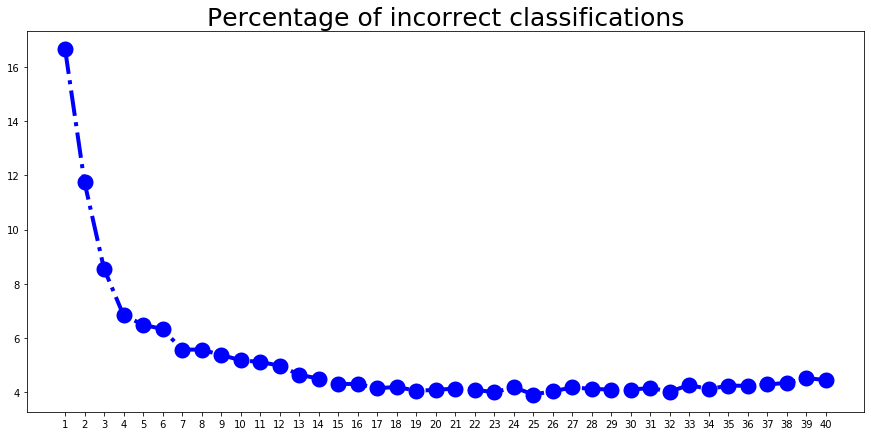

In [134]:
plt.figure(figsize=(15,7))
plt.plot(k_list,pct_incorrect,'bo-.',markeredgewidth=10,linewidth=4)
plt.xticks(k_list)
plt.title('Percentage of incorrect classifications',fontsize=25)

# Testing SVD-classifier

In [143]:
k = 15
'first k rows of the V matrices'
Vk_list = []
for i in range(10):
    Vk_list.append(V_list[i][:k])
    
y_test_predicted = [] #initialize y_val_predicted
'classify validation digits'
for j in range(len(y_test)):
    unknown_digit = X_test[j,:]
    distances = np.zeros(10)
    'compute distances'
    for i in range(10):
        orth = unknown_digit - unknown_digit@Vk_list[i].T@Vk_list[i]
        distances[i] = np.linalg.norm(orth)            
    y_test_predicted.append(str(np.argmin(distances)))
y_test_predicted = np.array(y_test_predicted)

In [160]:
'confusion matrix'
C = np.random.randn(10,10)
for i in range(10):
    for j in range(10):
        print(sum(y_test_predicted[y_test==str(i)]==str(j)))


966
1
0
0
0
0
9
1
3
0
0
1129
3
1
0
1
0
0
1
0
15
4
966
6
4
0
3
12
22
0
7
1
6
939
0
21
3
9
19
5
2
8
2
0
955
0
4
1
2
8
8
1
1
17
0
838
9
3
11
4
7
4
0
0
3
13
930
0
1
0
0
14
17
0
4
1
0
957
1
34
5
6
8
13
4
9
2
4
906
17
8
8
4
11
12
2
0
17
6
941


array([[-0.62210856, -0.74580274, -0.90404934, -2.09823209,  0.0653798 ,
        -0.49947378,  0.64522523, -2.22433142,  1.03786506,  0.62611739],
       [-1.27050732, -0.32605715, -0.19065679, -0.20399697,  1.76675385,
        -1.34537704, -0.20007834,  0.83706337, -1.56325875,  1.12373652],
       [ 0.61970189,  0.65326109, -0.54316296,  0.02059876,  1.27692047,
        -1.16154007, -0.29402547, -1.95405009, -0.29874624,  0.10117703],
       [ 0.31363802,  0.48965951, -0.04573518, -0.30516535,  1.56550198,
         0.65642815,  0.86340496, -0.17446839,  0.60645729,  0.35611038],
       [-0.47518608, -2.09477699,  0.86151796, -0.95951553, -0.98332067,
         0.31061014,  0.08956251,  0.24349901,  0.5941855 , -0.87031057],
       [ 0.48606776, -1.6657727 ,  0.43967529,  0.14819548, -0.85006383,
        -1.0291486 ,  0.63888946,  0.07515233,  0.51432867, -0.0940524 ],
       [ 0.53814054, -1.06015109, -1.9112224 , -1.57012123,  1.90903373,
         0.58753056, -0.34653724, -1.26730458

In [156]:
'percentage of correct classifications'
num_correct = sum(y_test == y_test_predicted)
100*num_correct/len(y_test)

95.27